# TP1

In [126]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [127]:
def normaliza_imagen(imagen):
    im_r, im_g, im_b = cv.split(imagen)
    
    total = cv.add(cv.add(im_r, im_g), im_b)

    total[total == 0] = 1

    im_r = (im_r / total)
    im_g = (im_g / total)
    im_b = (im_b / total)

    imagen_norm = cv.merge((np.uint8(255*im_r), np.uint8(255*im_g), np.uint8(255*im_b)))
    return imagen_norm

In [128]:
coordcrom_1 = cv.cvtColor(cv.imread('coord_cromaticas\\CoordCrom_1.png'), cv.COLOR_BGR2RGB)
coordcrom_2 = cv.cvtColor(cv.imread('coord_cromaticas/CoordCrom_2.png'), cv.COLOR_BGR2RGB)
coordcrom_3 = cv.cvtColor(cv.imread('coord_cromaticas/CoordCrom_3.png'), cv.COLOR_BGR2RGB)


imagenes = [coordcrom_1, coordcrom_2, coordcrom_3]

Imagen original


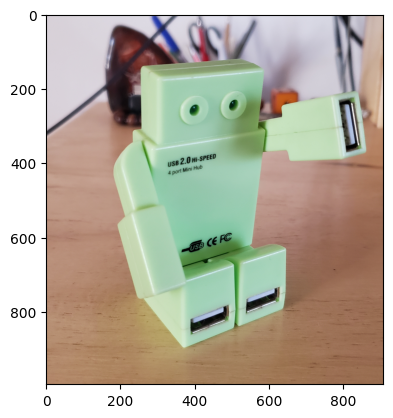

Imagen normalizada


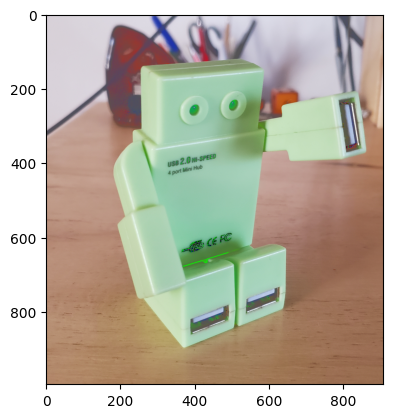

Imagen original


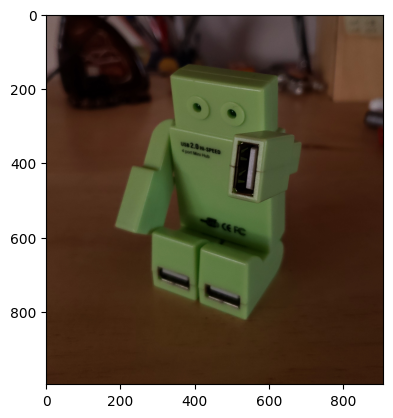

Imagen normalizada


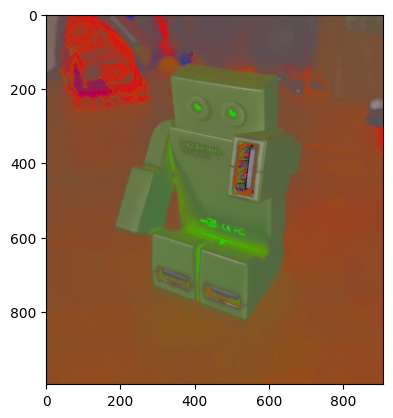

Imagen original


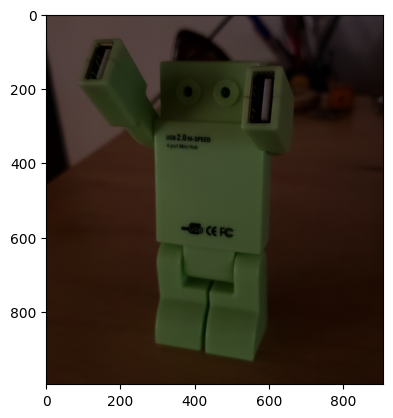

Imagen normalizada


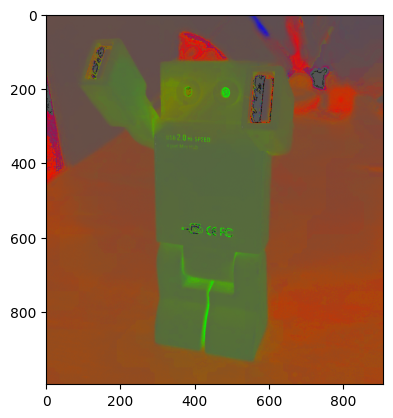

In [129]:
for i in imagenes:
    print("Imagen original")
    plt.imshow(i)
    plt.show()
    print("Imagen normalizada")
    plt.imshow(normaliza_imagen(i))
    plt.show()

## White Patch

In [130]:
def white_patch(x):
    im_r, im_g, im_b = cv.split(x)
    
    im_r = (255/ np.max(im_r) * im_r ) 
    im_g = (255/ np.max(im_g)* im_g )
    im_b = (255 / np.max(im_b)* im_b)


    return cv.merge((np.uint8(im_r), np.uint8(im_g), np.uint8(im_b)))

In [131]:
white_patch_test_blue = cv.cvtColor(cv.imread('../../Material_TPs/TP1/white_patch/test_blue.png'), cv.COLOR_BGR2RGB)
white_patch_test_green = cv.cvtColor(cv.imread('../../Material_TPs/TP1/white_patch/test_green.png'), cv.COLOR_BGR2RGB)
white_patch_test_red = cv.cvtColor(cv.imread('../../Material_TPs/TP1/white_patch/test_red.png'), cv.COLOR_BGR2RGB)
white_patch_wp_blue = cv.cvtColor(cv.imread('../../Material_TPs/TP1/white_patch/wp_blue.jpg'), cv.COLOR_BGR2RGB)
white_patch_wp_green = cv.cvtColor(cv.imread('../../Material_TPs/TP1/white_patch/wp_green.png'), cv.COLOR_BGR2RGB)
white_patch_wp_green2 = cv.cvtColor(cv.imread('../../Material_TPs/TP1/white_patch/wp_green2.jpg'), cv.COLOR_BGR2RGB)
white_patch_wp_red = cv.cvtColor(cv.imread('../../Material_TPs/TP1/white_patch/wp_red.png'), cv.COLOR_BGR2RGB)
white_patch_wp_red2 = cv.cvtColor(cv.imread('../../Material_TPs/TP1/white_patch/wp_red2.jpg'), cv.COLOR_BGR2RGB)

white_patch_list = [white_patch_test_blue, white_patch_test_green, white_patch_test_red, white_patch_wp_blue, white_patch_wp_green, white_patch_wp_green2, white_patch_wp_red, white_patch_wp_red2]

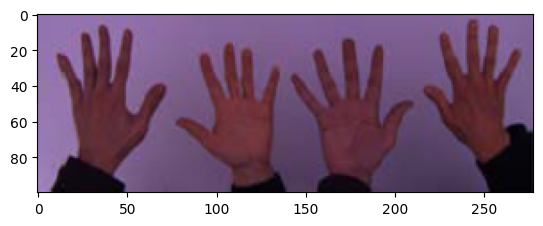

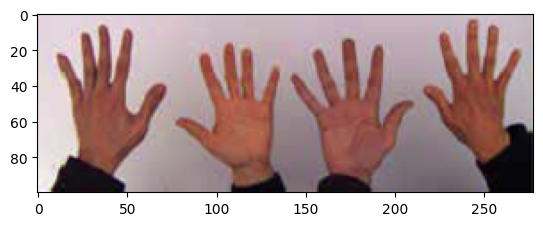

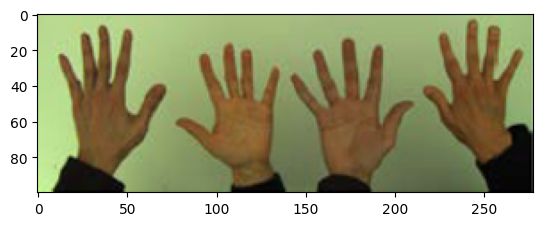

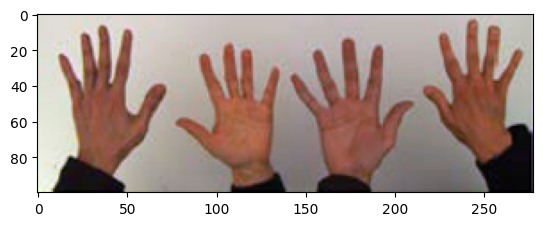

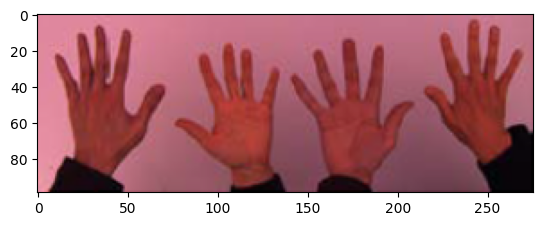

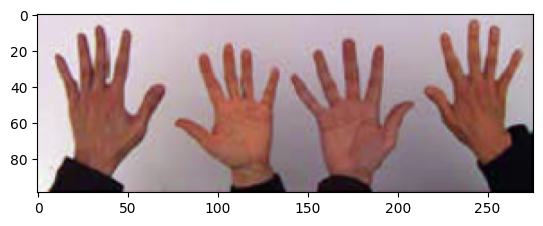

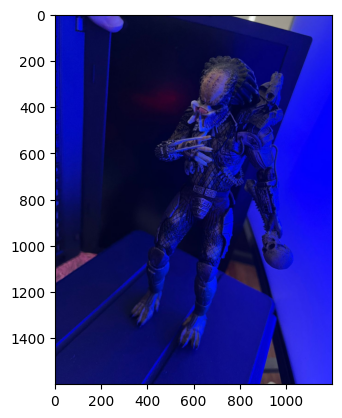

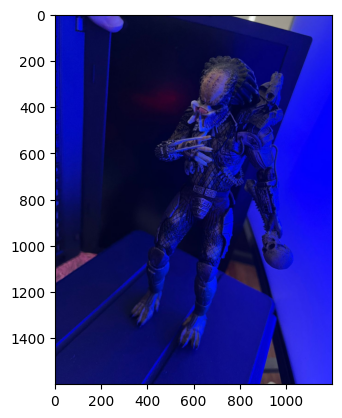

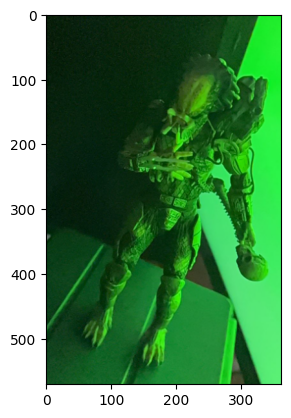

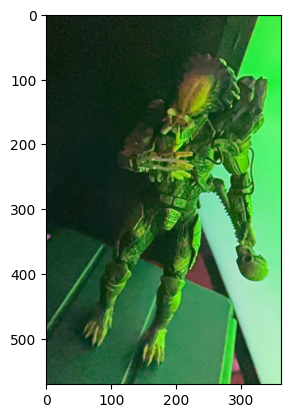

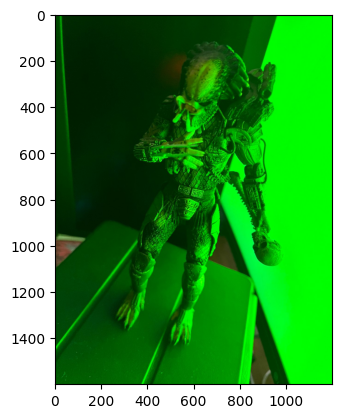

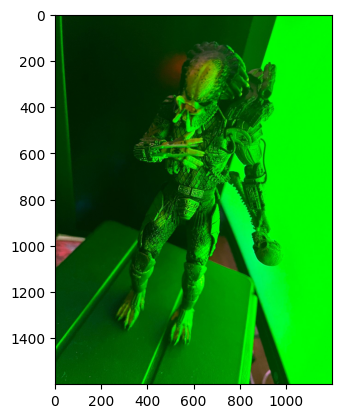

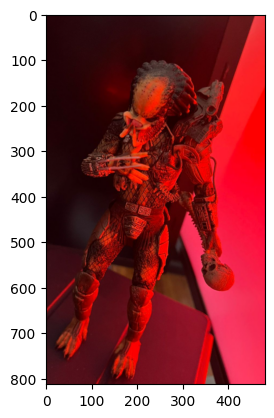

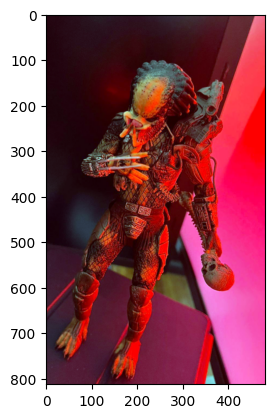

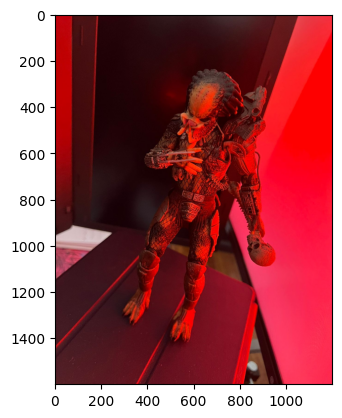

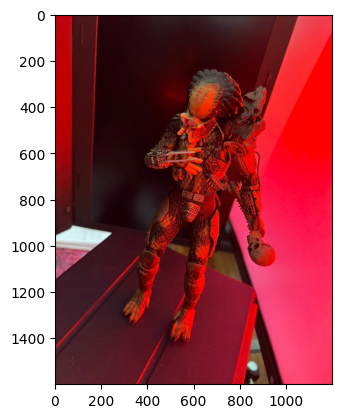

In [132]:
for i in white_patch_list:
    plt.imshow(i)
    plt.show()
    plt.imshow(white_patch(i))
    plt.show()

Todas las imagenes de manos mejoran ampliamente utilizando el white patch, eliminando casi completamente la luz con la que fueron iluminadas.
El problema se encuentra en la imagen de la figura de predator. En el ayuda muy poco aplicar el algoritmo, mas que nada en la zona del brazo izquierdo que casi se funde con el fondo.

## Parte 2

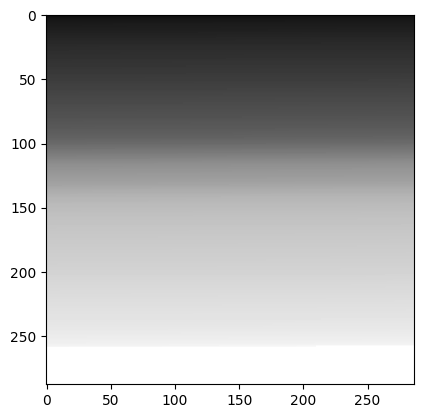

In [133]:
img1 = cv.imread('img1_tp.png', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('img2_tp.png', cv.IMREAD_GRAYSCALE)
plt.imshow(img1, cmap='gray')
plt.show()


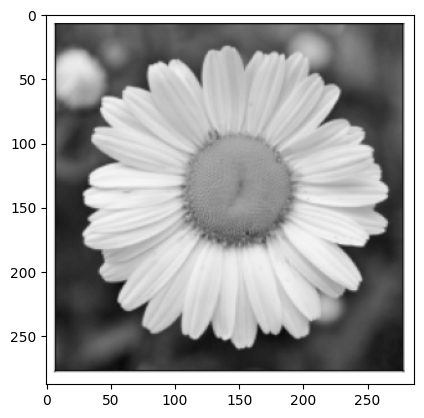

In [134]:
plt.imshow(img2, cmap='gray')
plt.show()

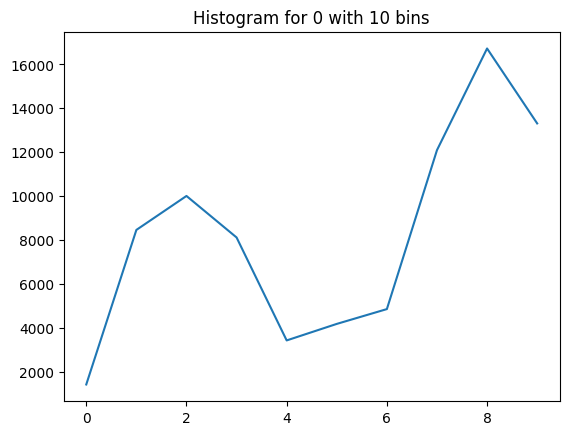

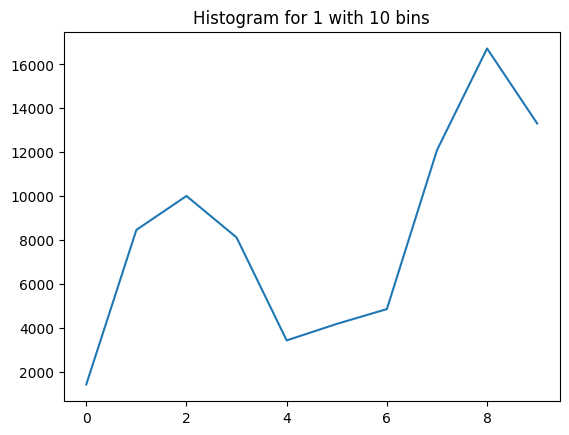

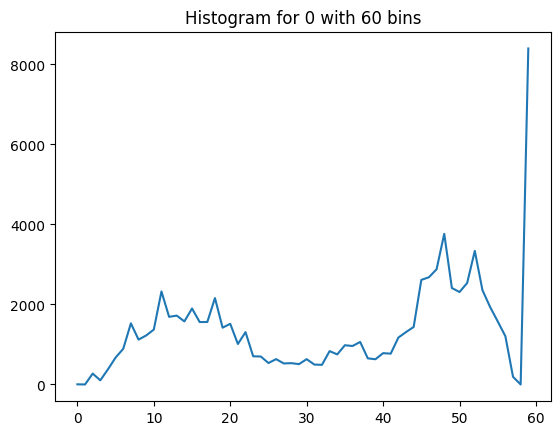

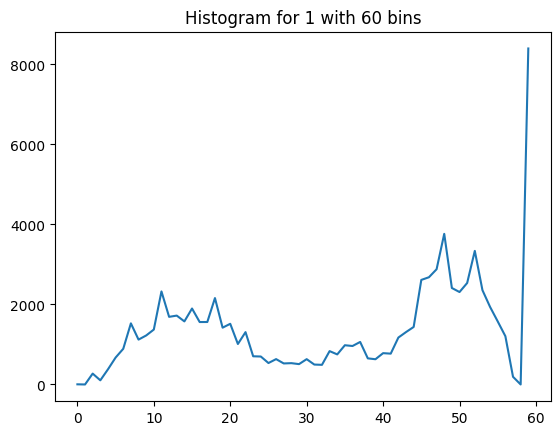

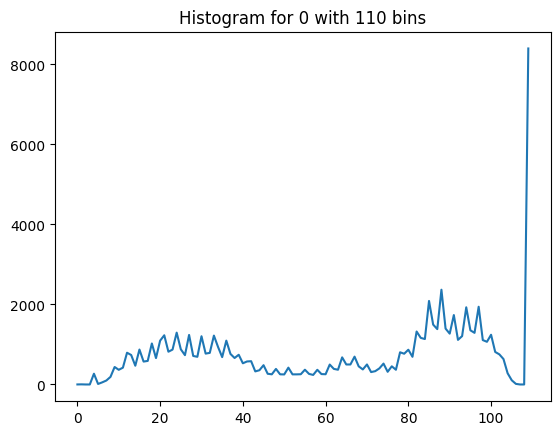

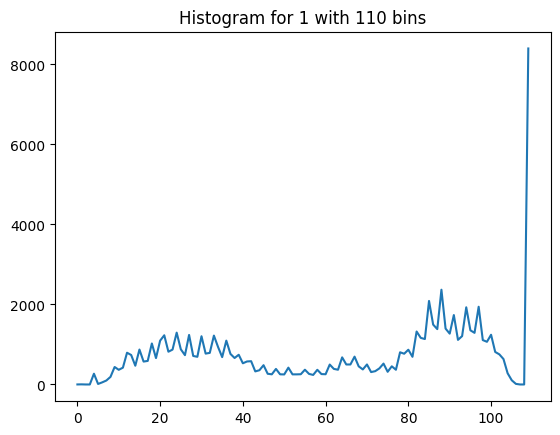

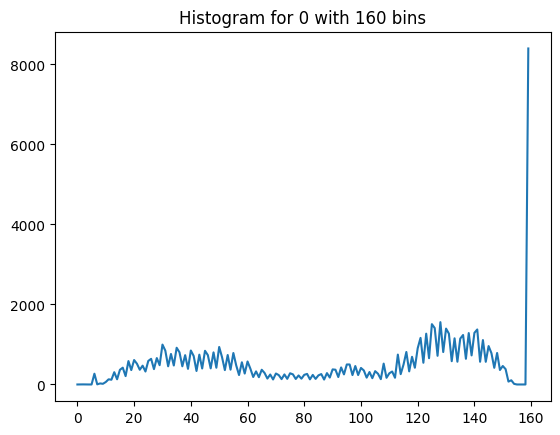

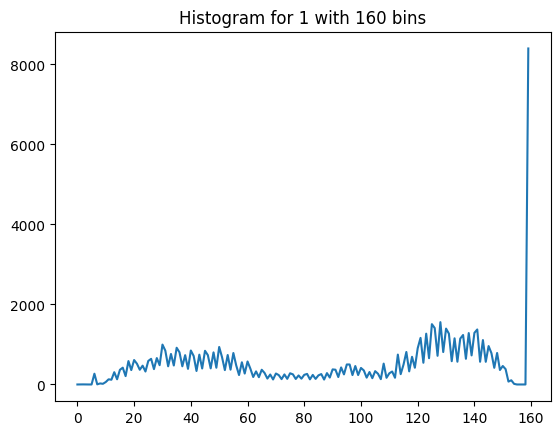

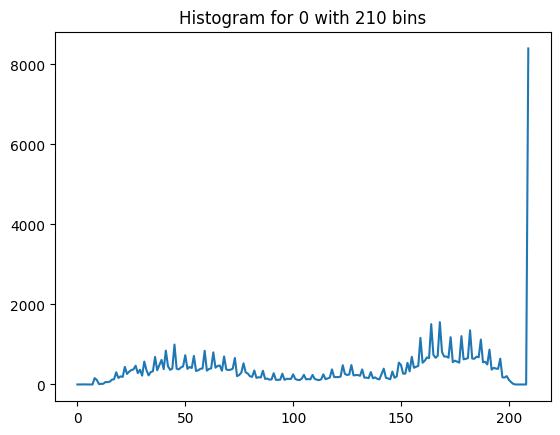

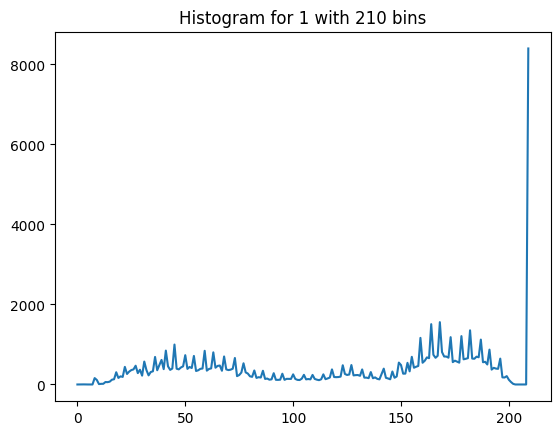

In [135]:
imgs = [img1, img2]
for x in range(10, 256, 50):
    for idx, i in enumerate(imgs):
        hist,bins = np.histogram(i.ravel(),x,[0,256])
        plt.title(f"Histogram for {idx} with {x} bins")
        plt.plot(hist)
        plt.show()

Al tener la misma cantidad de pixeles de las mismas intensidades, es imposible de diferenciar una imagen de la otra con los histogramas estos. No se le encuentra ninguna utilidad para los modelos clasificadores.

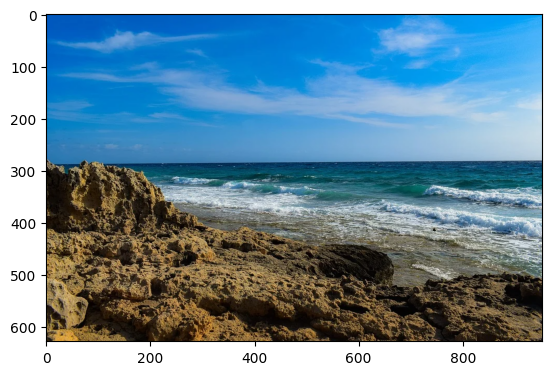

In [136]:
seg_img = cv.cvtColor(cv.imread('../../Material_TPs/TP1/segmentacion.png'), cv.COLOR_BGR2RGB)
plt.imshow(seg_img)

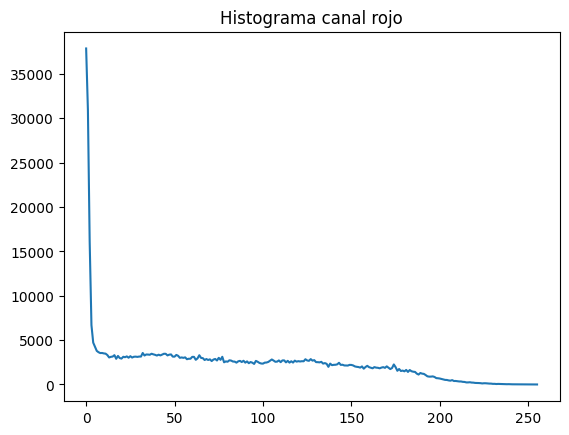

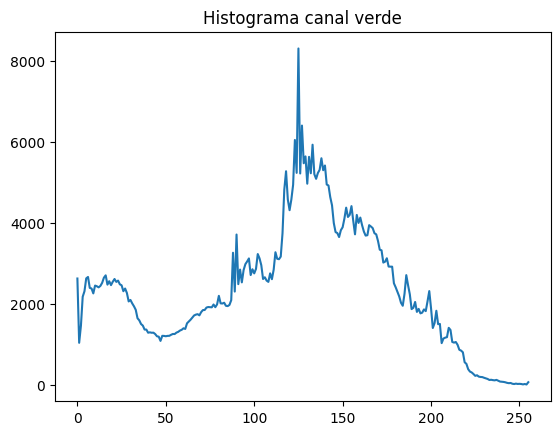

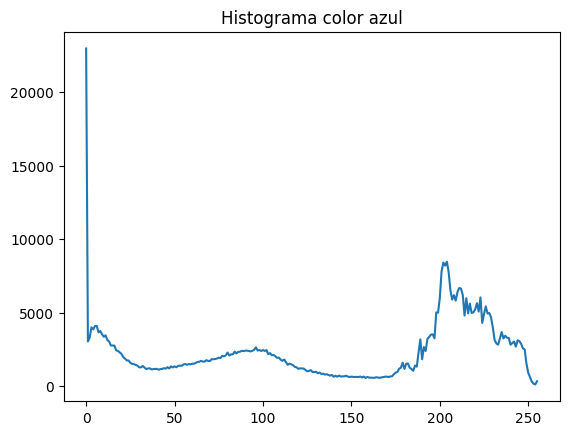

In [137]:
seg_img_r, seg_img_g, seg_img_b = cv.split(seg_img)

hist_r,bins = np.histogram(seg_img_r.ravel(),256,[0,256])
hist_g,bins = np.histogram(seg_img_g.ravel(),256,[0,256])
hist_b,bins = np.histogram(seg_img_b.ravel(),256,[0,256])

plt.title(f"Histograma canal rojo")
plt.plot(hist_r)
plt.show()

plt.title(f"Histograma canal verde")
plt.plot(hist_g)
plt.show()

plt.title(f"Histograma color azul")
plt.plot(hist_b)
plt.show()

En los histogramas observamos que el canal que menos aparece es el rojo, que esta muy poco presente y cuando aparece lo hace en las frecuencias cercanas a cero lo que implica que esta muy apagado.

El mas presente es el verde que se encuentra con altos valores en casi todas las frecuencias.

Para intentar segmentar por partes primero tomo unas muestras de cada region a segmentar a posteriori.

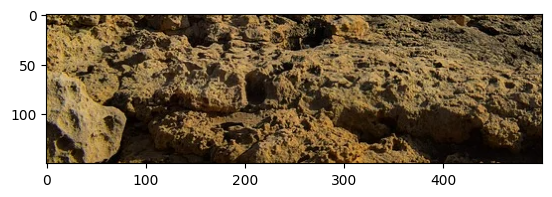

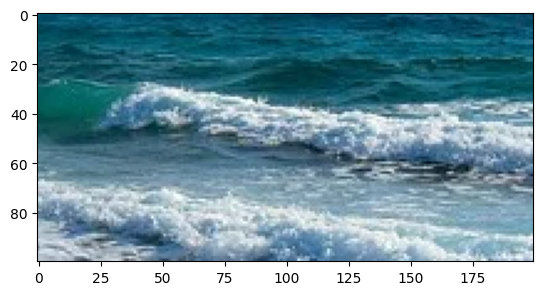

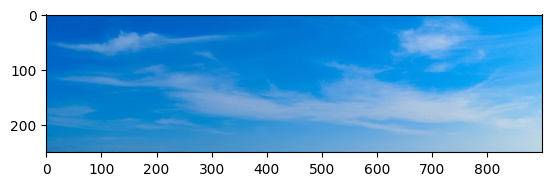

In [138]:
img_muestra_tierra = seg_img[450:600,0:500,:]
img_muestra_agua = seg_img[300:400,700:900,:]
img_muestra_cielo = seg_img[0:250,0:900,:]

plt.imshow(img_muestra_tierra)
plt.show()
plt.imshow(img_muestra_agua)
plt.show()
plt.imshow(img_muestra_cielo)
plt.show()

Con las muestras tomamos la media y desviacion estandar de cada una para luego segmentar.

TIERRA
[97.75518666666666, 76.77248, 46.49834666666667]
[58.558196008459454, 51.89840660350694, 37.95591544498023]
AGUA
[87.667, 131.322, 147.0045]
[70.5324309165649, 51.367945413457996, 49.300461252913244]
CIELO
[53.81912444444444, 147.4843911111111, 215.89584888888888]
[55.510347300001065, 28.025780447579344, 15.108836167085506]


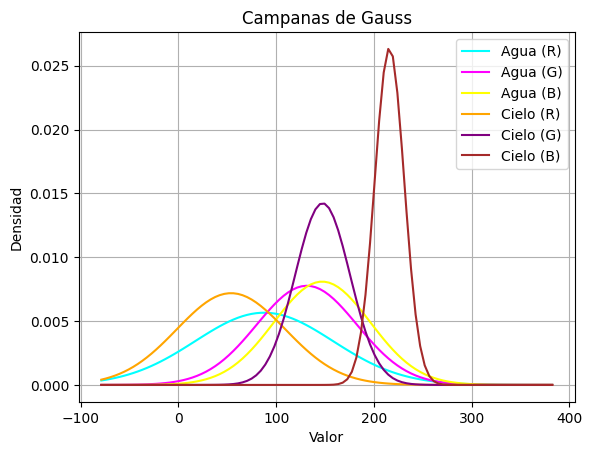

In [139]:
media_color_tierra, desviacion_std_tierra = cv.meanStdDev(img_muestra_tierra)
print("TIERRA")
print(media_color_tierra.flatten().tolist())
print(desviacion_std_tierra.flatten().tolist())

media_color_agua, desviacion_std_agua = cv.meanStdDev(img_muestra_agua)
print("AGUA")
print(media_color_agua.flatten().tolist())
print(desviacion_std_agua.flatten().tolist())

media_color_cielo, desviacion_std_cielo = cv.meanStdDev(img_muestra_cielo)
print("CIELO")
print(media_color_cielo.flatten().tolist())
print(desviacion_std_cielo.flatten().tolist())

# Crear un rango de valores para x
x = np.linspace(min(media_color_tierra - 3*desviacion_std_tierra), max(media_color_cielo) + 3*max(desviacion_std_cielo), 100)

# Calcular los valores de y para cada campana de Gauss (por cada canal de color)
y_tierra_r = (1 / (desviacion_std_tierra[0] * np.sqrt(2*np.pi))) * np.exp(-(x - media_color_tierra[0])**2 / (2*desviacion_std_tierra[0]**2))
y_tierra_g = (1 / (desviacion_std_tierra[1] * np.sqrt(2*np.pi))) * np.exp(-(x - media_color_tierra[1])**2 / (2*desviacion_std_tierra[1]**2))
y_tierra_b = (1 / (desviacion_std_tierra[2] * np.sqrt(2*np.pi))) * np.exp(-(x - media_color_tierra[2])**2 / (2*desviacion_std_tierra[2]**2))

y_agua_r = (1 / (desviacion_std_agua[0] * np.sqrt(2*np.pi))) * np.exp(-(x - media_color_agua[0])**2 / (2*desviacion_std_agua[0]**2))
y_agua_g = (1 / (desviacion_std_agua[1] * np.sqrt(2*np.pi))) * np.exp(-(x - media_color_agua[1])**2 / (2*desviacion_std_agua[1]**2))
y_agua_b = (1 / (desviacion_std_agua[2] * np.sqrt(2*np.pi))) * np.exp(-(x - media_color_agua[2])**2 / (2*desviacion_std_agua[2]**2))

y_cielo_r = (1 / (desviacion_std_cielo[0] * np.sqrt(2*np.pi))) * np.exp(-(x - media_color_cielo[0])**2 / (2*desviacion_std_cielo[0]**2))
y_cielo_g = (1 / (desviacion_std_cielo[1] * np.sqrt(2*np.pi))) * np.exp(-(x - media_color_cielo[1])**2 / (2*desviacion_std_cielo[1]**2))
y_cielo_b = (1 / (desviacion_std_cielo[2] * np.sqrt(2*np.pi))) * np.exp(-(x - media_color_cielo[2])**2 / (2*desviacion_std_cielo[2]**2))

# Graficar las campanas de Gauss
# plt.plot(x, y_tierra_r, color='red', label='Tierra (R)')
# plt.plot(x, y_tierra_g, color='green', label='Tierra (G)')
# plt.plot(x, y_tierra_b, color='blue', label='Tierra (B)')

plt.plot(x, y_agua_r, color='cyan', label='Agua (R)')
plt.plot(x, y_agua_g, color='magenta', label='Agua (G)')
plt.plot(x, y_agua_b, color='yellow', label='Agua (B)')

plt.plot(x, y_cielo_r, color='orange', label='Cielo (R)')
plt.plot(x, y_cielo_g, color='purple', label='Cielo (G)')
plt.plot(x, y_cielo_b, color='brown', label='Cielo (B)')

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Campanas de Gauss')
plt.legend()
plt.grid(True)
plt.show()
























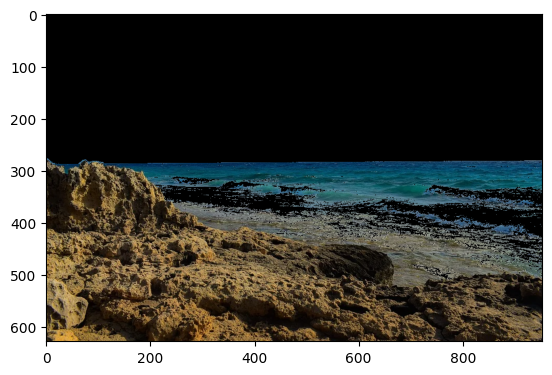

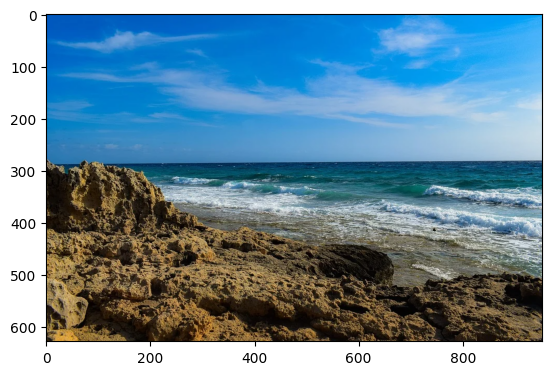

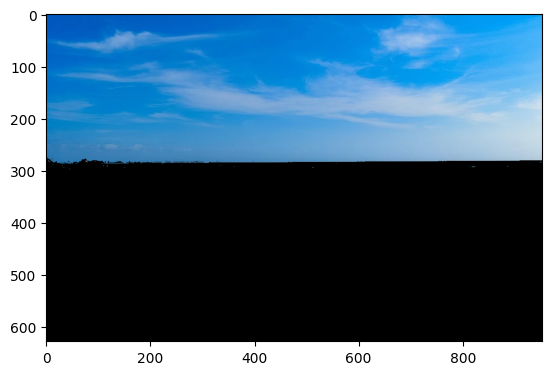

In [140]:
n_sigma = 3
y_limit = 300  # Puedes ajustar este valor según tus necesidades
mask_tierra = cv.inRange(seg_img, media_color_tierra-desviacion_std_tierra * n_sigma,  media_color_tierra+desviacion_std_tierra * n_sigma)
img_segmentada_tierra = cv.bitwise_and(seg_img, seg_img, mask=mask_tierra)

mask_agua = cv.inRange(seg_img, media_color_agua-desviacion_std_agua * n_sigma,  media_color_agua+desviacion_std_agua * n_sigma)
img_segmentada_agua = cv.bitwise_and(seg_img, seg_img, mask=mask_agua)



# Crear una máscara adicional para excluir los píxeles por debajo del límite en el eje y
mask_y_limit = np.ones_like(seg_img[:, :, 0], dtype=np.uint8)
mask_y_limit[y_limit:, :] = 0
mask_cielo_ok = cv.inRange(seg_img, media_color_cielo-desviacion_std_cielo * n_sigma,  media_color_cielo+desviacion_std_cielo * n_sigma)
# Aplicar la máscara adicional a la máscara existente del cielo
mask_cielo_ok = cv.bitwise_and(mask_cielo_ok, mask_y_limit)

# Aplicar la máscara a la imagen original del cielo
img_segmentada_cielo_ok = cv.bitwise_and(seg_img, seg_img, mask=mask_cielo_ok)

# mask_cielo_ok = cv.inRange(seg_img, media_color_cielo-desviacion_std_cielo * n_sigma,  media_color_cielo+desviacion_std_cielo * n_sigma)
# img_segmentada_cielo_ok = cv.bitwise_and(seg_img, seg_img, mask=mask_cielo_ok)

plt.imshow(img_segmentada_tierra)
plt.show()

plt.imshow(img_segmentada_agua)
plt.show()

plt.imshow(img_segmentada_cielo_ok)
plt.show()

Como vimos anteriormente en la grafica de las campanas, las medias de muchos colores estan muy cerca entre las regiones. Si aplicamos un sigma grande, probablemente no segmente bien ya que agarra a otras regiones tambien. Intentaremos con un sigma menor para intentar segmentar mejor con el valor de las medias.

Aproveche que en la imagen, cielo y mar se encuentran bastante delimitados tambien por su posicion, por esto agrego a la mascara de color, una mascara de posicion, por lo que los colores por debajo de tal posicion no se tienen en cuenta y luego le aplico la mascara de color tambien. Entre ambas, consigo una deteccion casi perfecta del cielo.

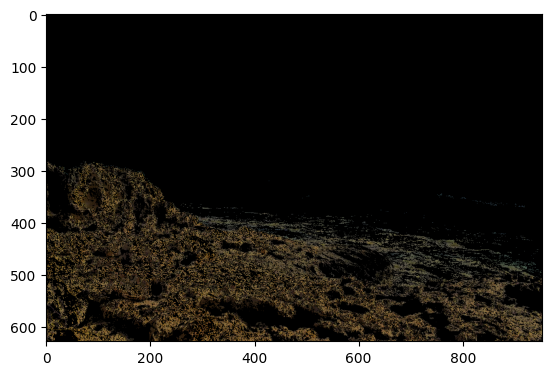

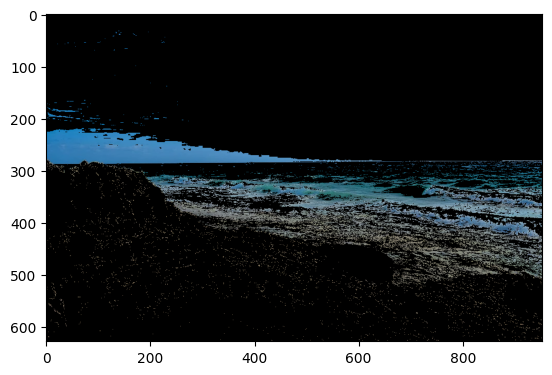

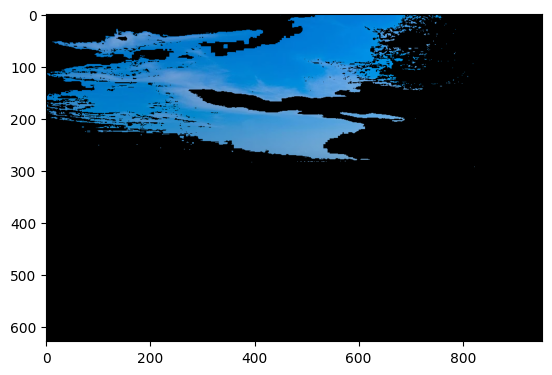

In [150]:
n_sigma = 1
mask_tierra_ok = cv.inRange(seg_img, media_color_tierra-desviacion_std_tierra * n_sigma,  media_color_tierra+desviacion_std_tierra * n_sigma)
img_segmentada_tierra_ok = cv.bitwise_and(seg_img, seg_img, mask=mask_tierra_ok)

mask_agua = cv.inRange(seg_img, media_color_agua-desviacion_std_agua * n_sigma,  media_color_agua+desviacion_std_agua * n_sigma)
img_segmentada_agua = cv.bitwise_and(seg_img, seg_img, mask=mask_agua)

mask_cielo = cv.inRange(seg_img, media_color_cielo-desviacion_std_cielo * n_sigma,  media_color_cielo+desviacion_std_cielo * n_sigma)
img_segmentada_cielo = cv.bitwise_and(seg_img, seg_img, mask=mask_cielo)

plt.imshow(img_segmentada_tierra_ok)
plt.show()

plt.imshow(img_segmentada_agua)
plt.show()

plt.imshow(img_segmentada_cielo)
plt.show()

Ahora la tierra fue segmentada bastante bien. Podemos usar un sigma 3 para el cielo y uno de 1 para la tierra

Modificar sigma resulta en una mejor segmentacion de la tierra y el mar pero no del cielo. El parecido entre los colores del cielo y el mar es tal que si detectamos uno, detectamos el otro.

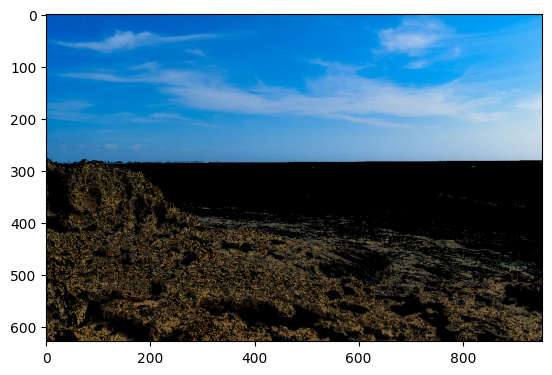

In [151]:
mask_cielo_y_tierra = cv.bitwise_or(mask_tierra_ok, mask_cielo_ok)
img_segmentada_cielo_y_tierra = cv.bitwise_and(seg_img, seg_img, mask=mask_cielo_y_tierra)

plt.imshow(img_segmentada_cielo_y_tierra)
plt.show()

In [145]:
mask_cielo = cv.bitwise_not(mask_cielo_y_tierra)
mask_cielo.shape

(628, 953)

In [146]:
# mask_cielo = np.array(mask_cielo/mask_cielo.max(), dtype=np.uint8)
# mask_cielo = np.zeros((628, 953), dtype=np.uint8)
mask_cielo

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

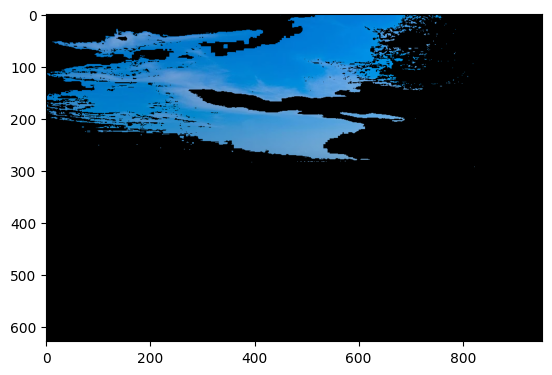

In [152]:
img_segmentada_cielo = cv.bitwise_and(seg_img, seg_img, mask=mask_cielo)

plt.imshow(img_segmentada_cielo)
plt.show()

No funciona utilizando solo la segmentacion por color. Por ende formare la nueva imagen con la resta de la imagen original y la que tiene la deteccion de los dos elementos.

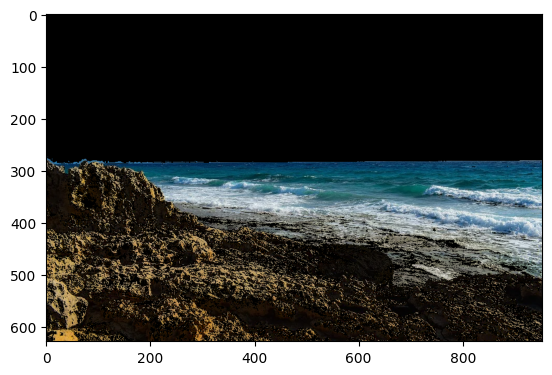

In [155]:
img_resultante = cv.subtract(seg_img, img_segmentada_cielo_y_tierra)
plt.imshow(img_resultante)
plt.show()

No funciono correctamente porque a la imagen original, para segmentar la tierra le habiamos aplicado un filtro con un sigma muy chico (1), por lo que en la imagen resultante, quedaron muchos elementos de color en la tierra. Usaremos el filtro de las mascaras inicial nuevamente sobre esta imagen para intentar finalizar de separar tierra y mar.

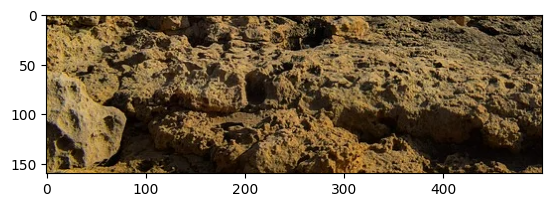

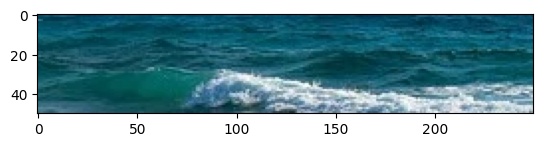

In [156]:
img_muestra_tierra = seg_img[450:610,0:500,:]
img_muestra_agua = seg_img[300:350,650:900,:]

plt.imshow(img_muestra_tierra)
plt.show()
plt.imshow(img_muestra_agua)
plt.show()

In [157]:
media_color_tierra, desviacion_std_tierra = cv.meanStdDev(img_muestra_tierra)
print("TIERRA")
print(media_color_tierra.flatten().tolist())
print(desviacion_std_tierra.flatten().tolist())

media_color_agua, desviacion_std_agua = cv.meanStdDev(img_muestra_agua)
print("AGUA")
print(media_color_agua.flatten().tolist())
print(desviacion_std_agua.flatten().tolist())

TIERRA
[96.82075, 75.76457500000001, 45.5031375]
[58.52063285233251, 51.716299897318386, 37.64837300808753]
AGUA
[40.714800000000004, 102.64312000000001, 117.53720000000001]
[58.8375120221785, 42.581102811759095, 41.75383259246985]


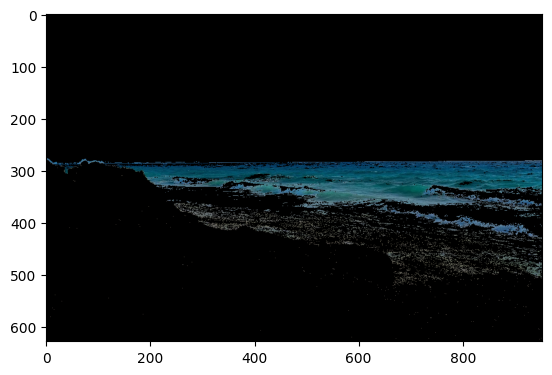

In [163]:
n_sigma=1.2
mask_agua = cv.inRange(img_resultante, media_color_agua-desviacion_std_agua * n_sigma,  media_color_agua+desviacion_std_agua * n_sigma)
img_segmentada_mar = cv.bitwise_and(img_resultante, img_resultante, mask=mask_agua)
plt.imshow(img_segmentada_mar)
plt.show()

Probando distintos sigmas podemos lograr esa imagen. Aunque las olas son dificiles de detectar. Quizas se podria aplicar otros filtros de posicion par a que en este lugar en especifico no aplique la mascara y mejorar asi los resultados